In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/financials.csv')

cols = [
    'Symbol',
    'Name',
    'Sector',
    'Price',
    'Price/Earnings',
    'Dividend Yield',
    'Earnings/Share',
    'Market Cap', '52 Week Low', '52 Week High'
]
df = df[cols]
df
# The dataset includes both categorical and numerical features that describe financial
# characteristics of S&P 500 companies. The Symbol represents each company’s stock ticker
# that is AAPL for Apple, while Name gives the full company name, and Sector indicates
# the industry category (such as Technology, Health Care, etc.). Among the numerical features,
# Price is the current trading price of a single share of the company. Price/Earnings (P/E ratio)
# tells how much investors are willing to pay per dollar of earnings—higher values can indicate
# growth expectations or overvaluation. Dividend Yield reflects the annual dividend as a
# percentage of the share price, giving insight into the income return on investment.
# Earnings/Share measures a company’s profitability by showing how much profit it makes
# per outstanding share. Lastly, Market Cap (market capitalization) is the total value of a
# company’s outstanding shares, which is often used to assess its size and financial stability.

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,52 Week Low,52 Week High
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,1.387211e+11,259.77,175.490
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,1.078342e+10,68.39,48.925
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,1.021210e+11,64.60,42.280
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,1.813863e+11,125.86,60.050
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,9.876586e+10,162.60,114.820
...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,1.291502e+10,76.81,46.860
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,2.700330e+10,86.93,62.850
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,2.445470e+10,133.49,108.170
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,1.067068e+10,55.61,38.430


In [3]:
# Based on the output of df.info(), the dataset consists of 8 columns and 505 entries.
# Among them, three columns Symbol, Name, and Sector are of type object, which typically
# represents categorical data such as company identifiers or categories. The remaining five
# columns: Price, Price/Earnings, Dividend Yield, Earnings/Share, and Market Cap are of type
# float64, indicating they are numerical variables. Most columns are fully populated with non-null
# values, with the exception of Price/Earnings, which has two missing entries out of 505.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   Market Cap      505 non-null    float64
 8   52 Week Low     505 non-null    float64
 9   52 Week High    505 non-null    float64
dtypes: float64(7), object(3)
memory usage: 39.6+ KB


In [4]:
# In the dataset, the Price/Earnings column contains two missing values,
# while all other columns are complete. Since Price/Earnings is one of
# the key numerical features being analyzed, I decided to drop the rows
# containing these missing values. I made this decision because the
# number of missing entries is very small so their removal has a negligible
# effect on the overall analysis. Dropping them also ensures that the dataset
# remains consistent and free of NaNs.

df.dropna(subset=['Price/Earnings'], inplace=True)

<ipython-input-4-433986e6c44e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Price/Earnings'], inplace=True)


In [5]:
df.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,52 Week Low,52 Week High
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000,503.000000
mean,103.978489,24.808390,1.902038,3.820199,4.938239e+10,122.819871,83.669227
std,134.669937,41.241081,1.537056,5.520354,9.020070e+10,155.633542,105.911445
min,2.820000,-251.530000,0.000000,-24.620000,2.626102e+09,6.590000,2.800000
25%,46.150000,15.350000,0.798369,1.495000,1.274957e+10,56.350000,38.440000
50%,73.920000,19.450000,1.790190,2.900000,2.143378e+10,86.680000,62.850000
75%,116.735000,25.750000,2.797169,5.145000,4.585282e+10,140.315000,97.270000
max,1806.060000,520.150000,12.661196,44.090000,8.095080e+11,2067.990000,1589.000000


In [6]:
df['Symbol'].nunique()

503

In [7]:
df['Name'].nunique()

503

In [8]:
df['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

In [9]:
df['Sector'].value_counts()

,count
Sector,
Consumer Discretionary,83
Information Technology,70
Financials,68
Industrials,67
Health Care,60
Consumer Staples,34
Real Estate,33
Energy,32
Utilities,28


<Axes: xlabel='Sector'>

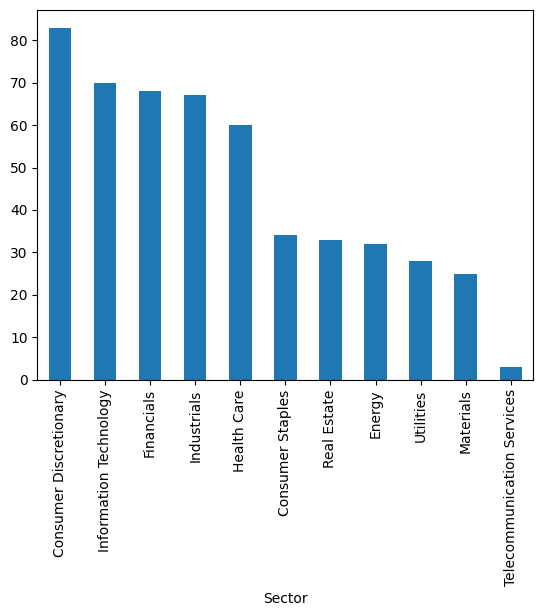

In [10]:
# The categorical feature Sector represents the industry classification for each company in
# the dataset. Using .value_counts(), we observe how the companies are distributed across
# these categories. We can also identify the most common and least common sectors For example,
# Consumer Discretionary is the most frequent sector, while Telecommunication Services is the least frequent.
df['Sector'].value_counts().plot.bar()

<Axes: >

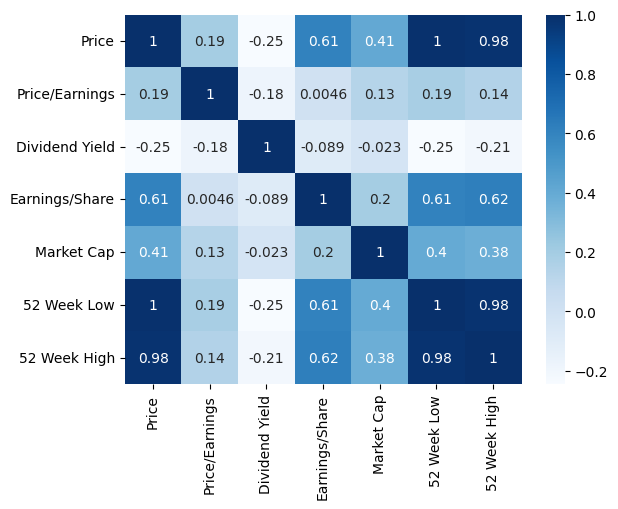

In [11]:
numerical_cols = ['Price',
                  'Price/Earnings',
                  'Dividend Yield',
                  'Earnings/Share',
                  'Market Cap', '52 Week Low', '52 Week High']
numerical_cols
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')

# Price and Earnings/Share Have a Moderate Positive Correlation r = 0.61 this is the strongest
# relationship in the dataset. This relationship is expected, companies that earn more per
# share tend to trade at higher prices. if a company is more profitable per share, investors are
# generally willing to pay more for it.

# Market Cap and Price Have a Moderate Positive Correlation r = 0.41)
# Companies with higher Market Capitalization tend to have higher
# stock prices. This relationship makes sense larger and more establish firms
# often trade at higher prices. However, it's not a strong correlation, which means
# some big firms  may still have low share prices.

# 52 Week Low and 52 Week High are highly correlated (r = 0.98)
# This means stocks that reach high prices also tend to have high lows.
# Expensive stocks usually stay expensive throughout the year.

# Price is strongly correlated with both 52 Week High and 52 Week Low.
# This means that stocks with higher prices today also tend to have had higher highs
# and higher lows over the past year.

# Earnings/Share has a moderate positive correlation with both 52 Week High and Low.
# This means that more profitable companies tend to have higher stock prices overall
# both at their best and worst points in the past year.

# Market Cap and Earnings/Share Have a Weak Positive Correlation r = 0.2
# Large firms may reinvest earnings rather than distribute them,
# keeping EPS moderate even if total profits are high. Like companies who often prioritize
# long-term growth over short-term profitability. As a result, their earnings per share
# can appear lower, even though their overall Market Cap is very large.

<Axes: xlabel='Earnings/Share', ylabel='Price'>

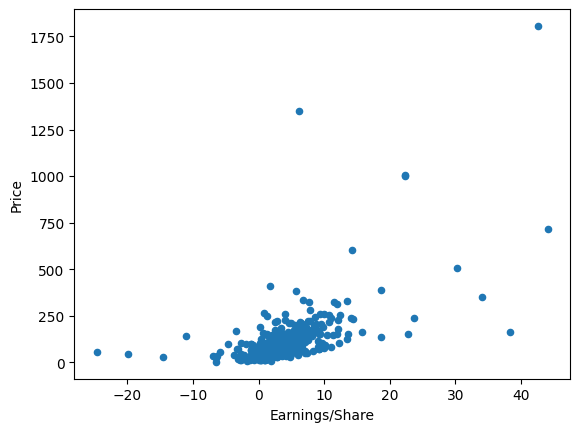

In [12]:
df.plot.scatter(x="Earnings/Share", y="Price")
# There is a visible upward trend, as EPS increases, Price also tends to increase.
# This confirms a moderate positive relationship. Companies with higher earnings
# per share are generally priced higher in the stock market.

# Most data points are tightly clustered in the range:
# EPS between 0 to 10 and Price between 0 to 250 This suggests most companies
# have modest earnings and moderate stock prices.

# There are a few extreme values:
# EPS greater than 20 and Price greater than 500. These are likely high-growth
# companies or special cases with extremely high earnings and prices.

<Axes: xlabel='Market Cap', ylabel='Price'>

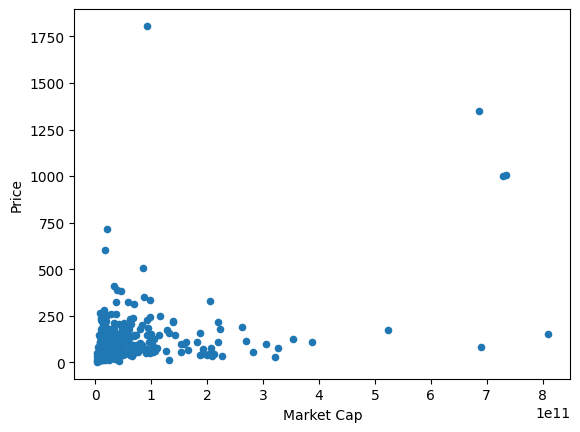

In [13]:
df.plot.scatter(x="Market Cap", y="Price")

# The overall correlation between Market Cap and Price is about 0.41,
# but the scatter plot shows that this relationship is driven almost entirely by a
# handful of outliers. Within the main cluster of mid‑cap stocks there
# is little to no visible trend. Recomputing the correlation after
# removing the top 5 % of Market Cap values, will likely cause it to drop sharply.

<Axes: xlabel='Earnings/Share', ylabel='Market Cap'>

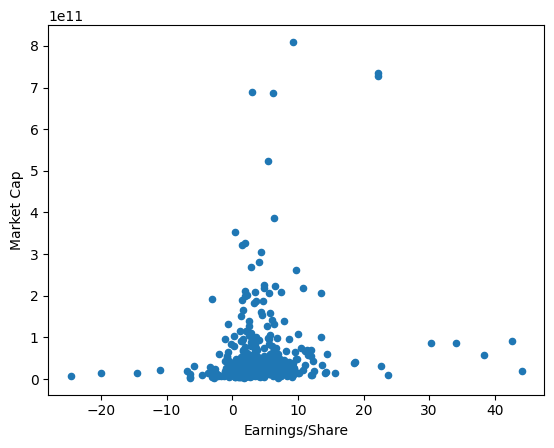

In [14]:
df.plot.scatter(x="Earnings/Share", y="Market Cap")
# Excluding the handful of outliers, there’s
# only a slight positive trend between Earnings Per Share and Market Cap.
# Most companies cluster tightly in the 0–10 USD EPS and 0–200 B cap range,
# indicating that total company size is influenced by factors beyond per‑share

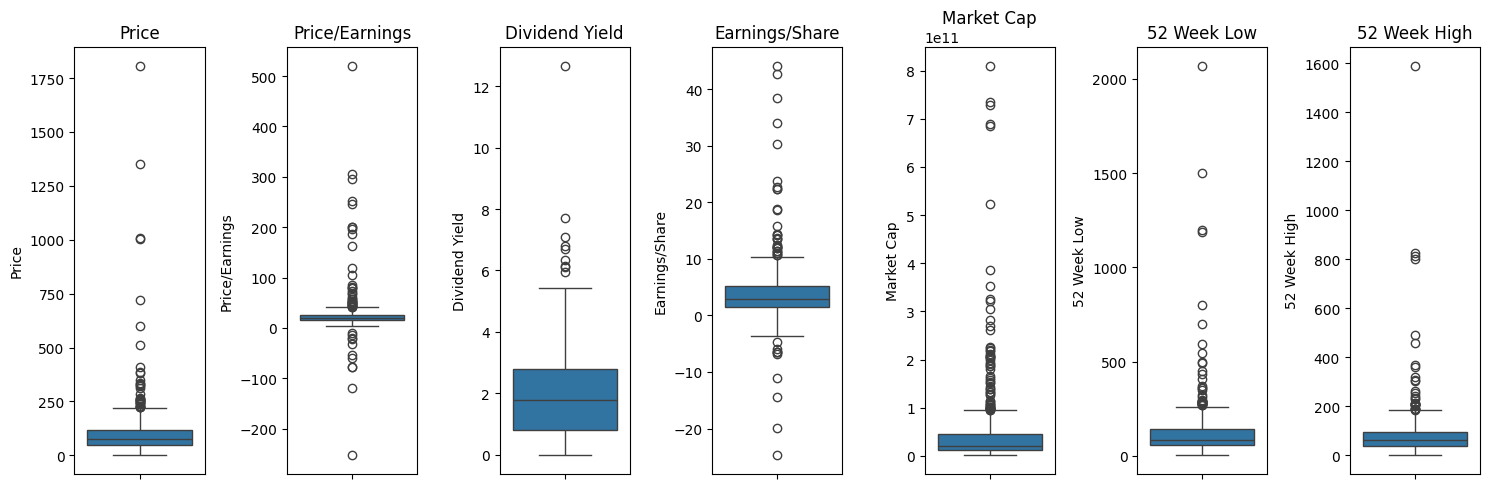

<Figure size 640x480 with 0 Axes>

In [15]:
# The extreme values are squeezing the inner quartiles almost flat,
# so it’s hard to read the typical range.
num_columns = len(numerical_cols)

plt.figure(figsize=(15, 5))

for i in range(num_columns):
    plt.subplot(1, num_columns, i + 1)
    sns.boxplot(y=df[numerical_cols[i]])
    plt.title(numerical_cols[i])

plt.tight_layout()
plt.show()
plt.tight_layout()

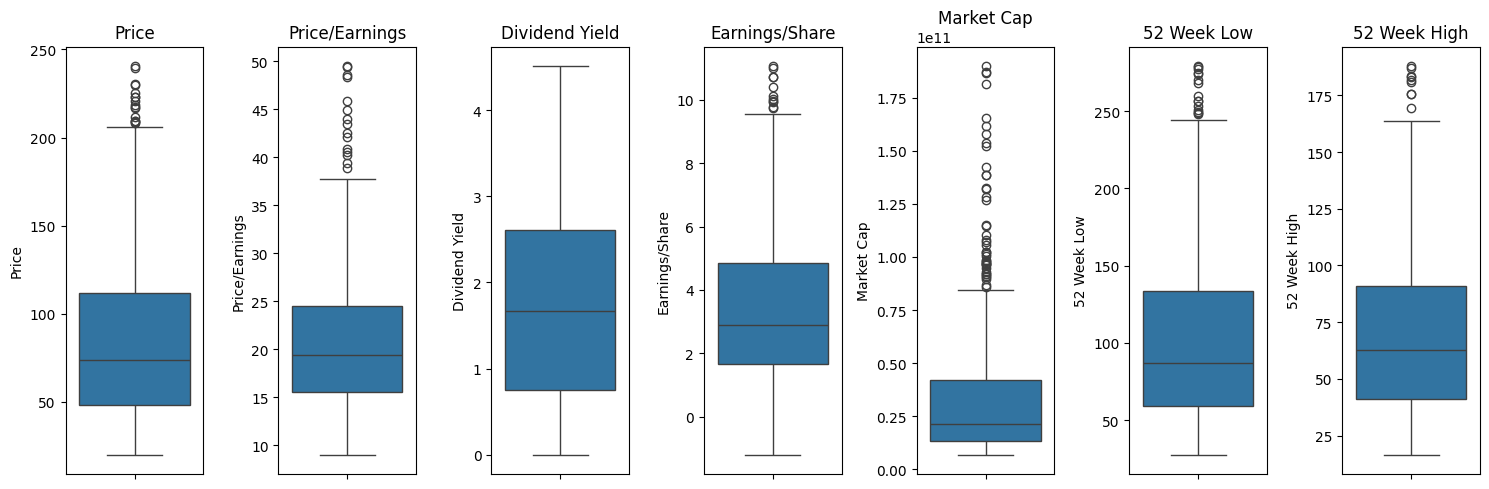

In [16]:
#“The raw box‑plots were dominated by a handful of extreme values.
# To visualise the central tendency more clearly, I removed the top and bottom 5% of
# each numeric column. This keeps 90 % of the data and prevents a handful of extreme values
# from compressing the inter‑quartile range.

# After trimming the top and bottom 5% of values, the boxplots show clearer distributions
# for each financial feature. Most stock prices cluster between $50 and $115, and typical
# P/E ratios fall between 15 and 25. Dividend yields mostly stay under 3, and EPS centers
# around $2–$5. Market caps still span a wide range, but are now easier to interpret.


df_trim = df[numerical_cols].copy()
for col in numerical_cols:
    lower = df_trim[col].quantile(0.05)
    upper = df_trim[col].quantile(0.95)
    df_trim[col] = df_trim[col][(df_trim[col] >= lower) & (df_trim[col] <= upper)]

plt.figure(figsize=(15, 5))
for i in range(len(numerical_cols)):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df_trim[numerical_cols[i]].dropna())
    plt.title(numerical_cols[i])

plt.tight_layout()
plt.show()

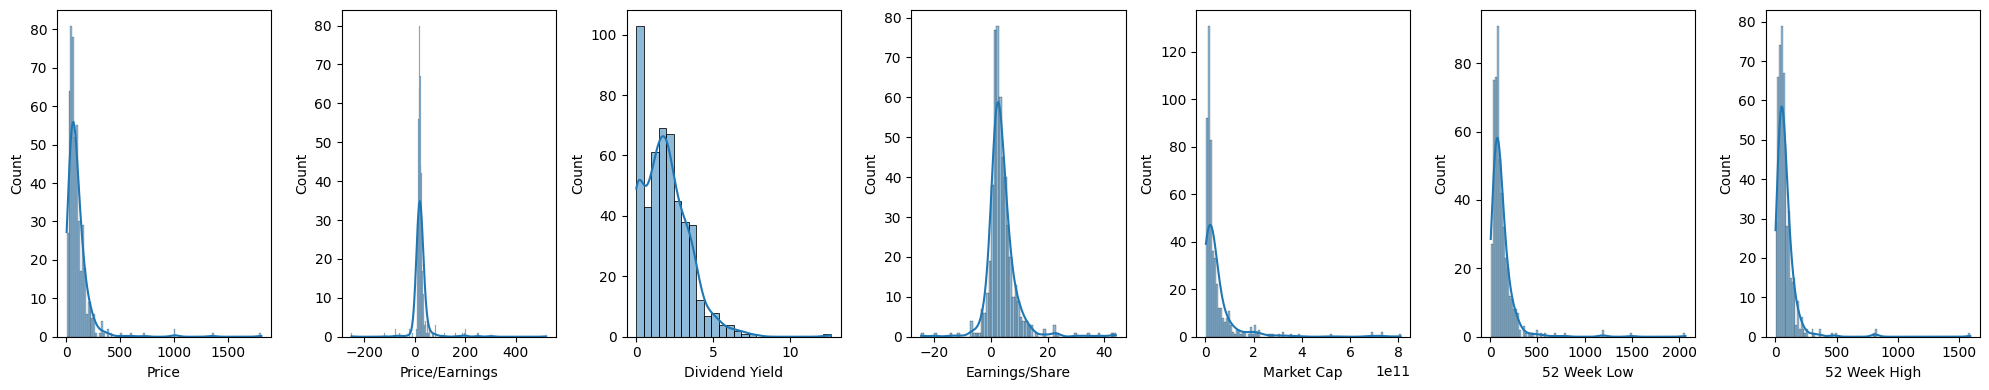

In [17]:
# The histograms for the numerical features in the dataset reveal that most variables
# are highly skewed, indicating that the majority of companies cluster around
# lower values while a few outliers stretch the distribution toward much higher values.
# Specifically, Price/Earnings, Market Cap, and Price all show strong skew,
# suggesting the presence of a small number of extremely large companies

plt.figure(figsize=(20, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
plt.show()

#PART 3: High-level analysis

#Analysis 1: Subgroup Correlation Analysis

“Do relationships between financial variables change depending on whether a company is profitable or not?”


Expectation:
I expect profitable companies to show stronger and more meaningful correlations between stock price and earnings-related variables, while unprofitable companies may show no significant such patterns.

In [18]:
# Create two groups: profitable EPS > 0 and unprofitable EPS <= 0
profitable = df[df['Earnings/Share'] > 0]
unprofitable = df[df['Earnings/Share'] <= 0]


In [19]:
profitable_stats = profitable.describe()
profitable_stats

,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,52 Week Low,52 Week High
count,452.000000,452.000000,452.000000,452.000000,4.520000e+02,452.000000,452.000000
mean,110.045288,24.450133,1.934124,4.614336,5.183452e+10,129.602168,88.422049
std,140.311201,34.776143,1.546878,5.011384,9.414196e+10,162.261724,110.363727
min,10.430000,-119.890000,0.000000,0.010000,3.034276e+09,13.480000,9.700000
25%,50.650000,15.382500,0.837383,1.907500,1.292812e+10,60.740000,41.670000
50%,77.890000,19.445000,1.828041,3.280000,2.198654e+10,89.885000,65.995050
75%,127.550000,25.082500,2.815063,5.547500,4.764817e+10,148.542500,102.752500
max,1806.060000,520.150000,12.661196,44.090000,8.095080e+11,2067.990000,1589.000000


In [20]:
unprofitable_stats = unprofitable.describe()
unprofitable_stats

,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,52 Week Low,52 Week High
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000
mean,50.210000,27.983529,1.617671,-3.218039,2.764976e+10,62.710098,41.546178
std,34.998839,78.461763,1.429960,4.817190,3.477588e+10,39.990019,27.239896
min,2.820000,-251.530000,0.000000,-24.620000,2.626102e+09,6.590000,2.800000
25%,25.510000,10.780000,0.444757,-3.180000,9.687310e+09,34.145000,23.377500
50%,37.730000,20.210000,1.419558,-1.280000,1.387501e+10,55.480000,31.890000
75%,70.170000,43.750000,2.383096,-0.735000,2.869587e+10,81.705000,59.435000
max,169.160000,305.560000,4.961832,0.000000,1.927093e+11,199.830000,125.460000


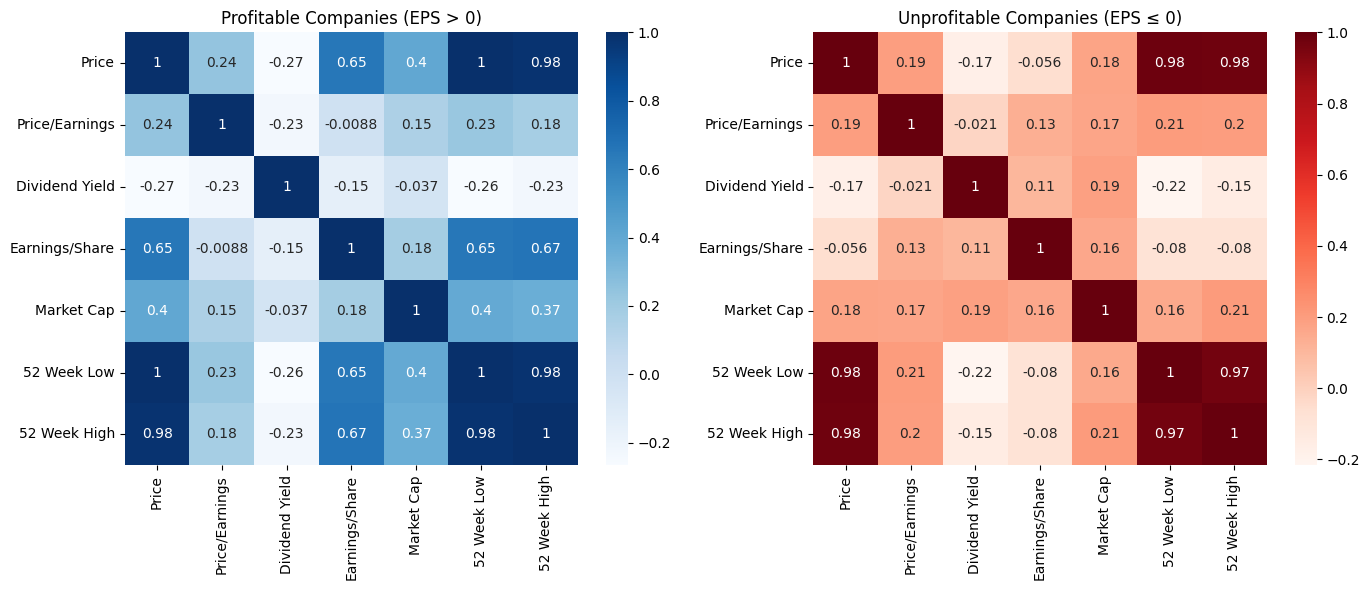

In [21]:
# #In the full dataset, Price and Earnings/Share have a moderate positive correlation r = 0.61,
# which is the strongest overall relationship. After splitting the data, this correlation increases
# for profitable companies r = 0.65, showing that strong earnings lead to higher stock prices
# when EPS is positive. But in unprofitable companies, the relationship disappears r = -0.056,
# meaning earnings no longer help explain price.

# Market Cap and Price had a moderate correlation in the full dataset r = 0.41.
# This remains similar for profitable companies r = 0.40, but weakens for unprofitable ones r = 0.18,
# suggesting that size and price are less connected when companies are not making money.

# 52 Week Low and 52 Week High are still highly correlated in both groups r ≈ 0.98,
# meaning that stocks with high highs usually also have high lows, no matter their profitability.
# Expensive stocks stay within high price ranges across the year.

# Price is also strongly correlated with both 52 Week High and Low in all cases.
# Stocks that are priced higher today have also hit higher highs and higher lows during the year,
# regardless of whether they’re profitable or not.

# Earnings/Share shows a moderate positive correlation with 52 Week High and Low for profitable companies
# r = 0.67 and r = 0.65, showing that profitable firms tend to stay high-performing throughout the year.
# For unprofitable companies, this relationship fades r ≈ -0.08, because their earnings are already negative.

# Market Cap and Earnings/Share still have a weak correlation in both groups.
# Some large firms may have low EPS due to reinvestment or long-term growth strategies.
# So company size does not always mean high earnings per share.

profitable_corr = profitable[numerical_cols].corr()
unprofitable_corr = unprofitable[numerical_cols].corr()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(profitable_corr, annot=True, cmap="Blues")
plt.title("Profitable Companies (EPS > 0)")

plt.subplot(1, 2, 2)
sns.heatmap(unprofitable_corr, annot=True, cmap="Reds")
plt.title("Unprofitable Companies (EPS ≤ 0)")

plt.tight_layout()


In [22]:
# Idea for next analysis: Clustering Financial Profiles

# As a next step, I plan to apply clustering that is KMeans to group companies based on their financial characteristics.
# I hope to uncover hidden patterns or types of companies in the dataset  for example, distinguishing between high-growth firms, stable dividend payers, or undervalued companies.

# I will use numerical features like Price, Earnings/Share, Market Cap, Dividend Yield, and 52 Week Range to identify natural groupings.
# By visualizing these clusters, I hope to gain insight into how companies differ across financial dimensions beyond just profitability.


In [23]:
### Subgroup Correlation Analysis and Dataset Updates

# Based on feedback from Checkpoint 2, I reintroduced the 52 Week High and 52 Week Low columns into the dataset. These features provide
# valuable insight into a stocks price range and stability over the past year and are useful for identifying volatility and performance trends.

# I also conducted a subgroup correlation analysis by splitting the dataset into profitable EPS > 0 and unprofitable EPS ≤ 0 companies.
# This allowed me to compare how relationships between key financial variables change based on profitability.

#Analysis 2: High-Price Outliers: Sector Distribution and Financial Characteristics

Which sectors do the companies with the most expensive share prices belong to, and do these outliers share any distinct financial traits such as higher earnings or larger market value?

In [24]:
# We extract the top 1% of the dataset based on share price,
# representing companies with unusually high stock prices.

# we define the 99th percentile threshold for share price
price_threshold = df['Price'].quantile(0.99)

# we split the dataset into high-price outliers and the rest
outliers = df[df['Price'] >= price_threshold]
non_outliers = df[df['Price'] < price_threshold]

print(f"Top 1% share price threshold: ${price_threshold:.2f}")
print(f"Number of outlier companies: {outliers.shape[0]}")
print(f"Number of non-outlier companies: {non_outliers.shape[0]}")

Top 1% share price threshold: $599.17
Number of outlier companies: 6
Number of non-outlier companies: 497


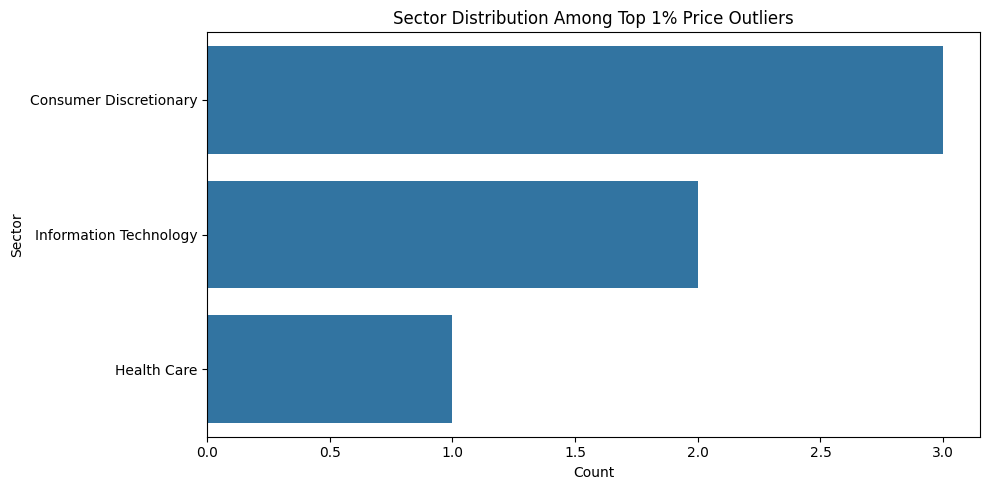

In [25]:
# We selected the top 1% of companies in the dataset based on share price,
# representing the companies with the most expensive individual shares.
# This resulted in 6 outlier companies.
# These companies are distributed across 3 sectors:
# - Consumer Discretionary: 3 companies
# - Information Technology: 2 companies
# - Health Care: 1 company
plt.figure(figsize=(10,5))
sns.countplot(y='Sector', data=outliers, order=outliers['Sector'].value_counts().index)
plt.title("Sector Distribution Among Top 1% Price Outliers")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

In [26]:
# The six companies with the highest share prices in the dataset Priceline.com, Amazon.com,
# Alphabet Inc (Class A and C), AutoZone, and Mettler Toledo span three sectors and are all widely
# recognized industry leaders. These companies tend to exhibit very high Earnings Per Share EPS
# and extremely large Market Capitalizations.
outliers_sorted = outliers.sort_values(by='Price', ascending=False)
outliers_sorted[['Name', 'Price', 'Sector']].head(6)

,Name,Price,Sector
372,Priceline.com Inc,1806.06,Consumer Discretionary
30,Amazon.com Inc,1350.50,Consumer Discretionary
27,Alphabet Inc Class A,1007.71,Information Technology
28,Alphabet Inc Class C,1001.52,Information Technology
61,AutoZone Inc,718.57,Consumer Discretionary
306,Mettler Toledo,601.00,Health Care


In [27]:
# Outliers have an average EPS nearly 7× higher than non-outliers, suggesting
# they are significantly more profitable on average on a per-share basis. Their average
# market cap is more than 8× larger, indicating they are also the largest firms
# by total valuation.

summary = pd.DataFrame({
    "Group": ["Outliers", "Non-Outliers"],
    "Avg EPS": [outliers['Earnings/Share'].mean(), non_outliers['Earnings/Share'].mean()],
    "Avg Market Cap": [outliers['Market Cap'].mean(), non_outliers['Market Cap'].mean()]
})
summary

,Group,Avg EPS,Avg Market Cap
0,Outliers,25.281667,3.793989e+11
1,Non-Outliers,3.561107,4.539829e+10


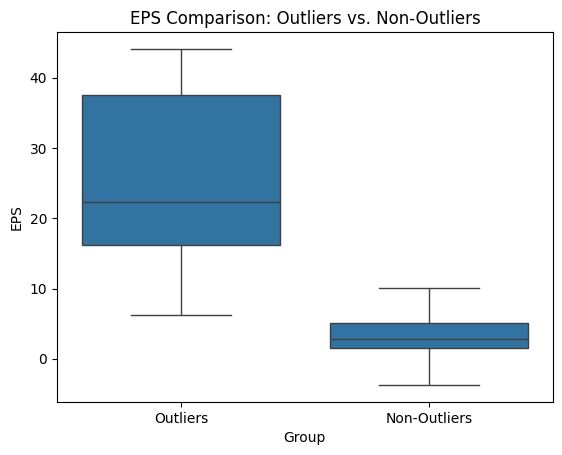

In [28]:
# EPS Comparison: Outliers vs. Non-Outliers
# To evaluate whether companies with unusually high share prices are also more profitable,
# we compare Earnings Per Share EPS between high-price outliers top 1% and the rest of the dataset.
#
# The boxplot shows that outliers have a significantly higher median EPS and much greater variance.
# This suggests that companies with expensive shares tend to be more profitable on a per-share basis,
# reinforcing the idea that high prices are supported by strong earnings.


eps_df = pd.concat([
    pd.DataFrame({'Group': 'Outliers', 'EPS': outliers['Earnings/Share']}),
    pd.DataFrame({'Group': 'Non-Outliers', 'EPS': non_outliers['Earnings/Share']})
])

sns.boxplot(x='Group', y='EPS', data=eps_df, showfliers=False)
plt.title("EPS Comparison: Outliers vs. Non-Outliers")
plt.show()

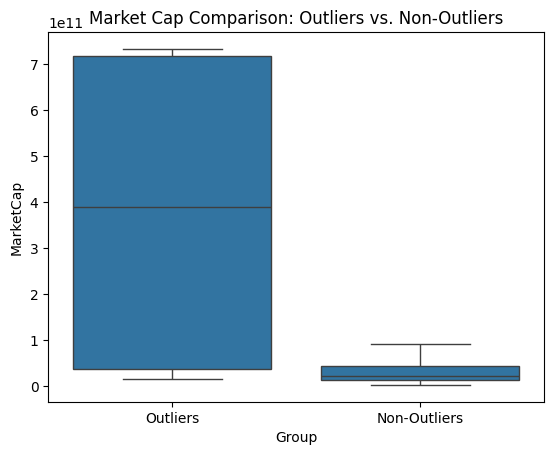

In [29]:
# Market Capitalization Comparison
# We compared the total market value of outliers (top share price companies) versus non-outliers.
# The boxplot shows that outliers are overwhelmingly larger, with a median market cap around $400 billion.
# In contrast, non-outliers are significantly smaller and more concentrated in the lower end of the distribution.
# This suggests that the most expensive stocks in the dataset belong to the largest and most dominant firms in the market.
market_cap_df = pd.concat([
    pd.DataFrame({'Group': 'Outliers', 'MarketCap': outliers['Market Cap']}),
    pd.DataFrame({'Group': 'Non-Outliers', 'MarketCap': non_outliers['Market Cap']})
])

sns.boxplot(x='Group', y='MarketCap', data=market_cap_df, showfliers=False)
plt.title("Market Cap Comparison: Outliers vs. Non-Outliers")
plt.show()

# Analysis 3: Lineare Regression

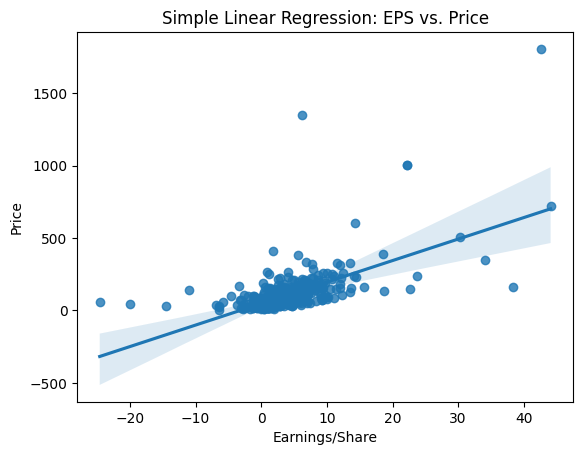

In [30]:
# Building a linear regression model, we find that stock price increases with a slope of approximately 14.85 per unit increase in EPS, and p < 0.01.

# Null hypothesis: The slope is 0, EPS has no effect on stock price.
# Alternative hypothesis: The slope is not 0, EPS does affect stock price.

# Significance: Since the p-value is much smaller than 0.05, we reject the null hypothesis.
# We conclude that earnings per share (EPS) has a statistically significant positive effect on stock price.

# On average, for every 1 unit increase in EPS, stock price increases by approximately $14.85.
# This trend is both statistically significant and meaningful, indicating that EPS is an important driver of stock price.
sns.regplot(x='Earnings/Share', y='Price', data=df)
plt.title("Simple Linear Regression: EPS vs. Price")
plt.show()

In [31]:
stats.linregress(df['Earnings/Share'], df['Price'])

LinregressResult(slope=np.float64(14.845425633062014), intercept=np.float64(47.26601177044405), rvalue=np.float64(0.6085396609640584), pvalue=np.float64(2.7893613008929492e-52), stderr=np.float64(0.8648577338140585), intercept_stderr=np.float64(5.802134330288243))

# Analysis 4: K-means clustering

In [32]:
df['Volatility'] = (df['52 Week High'] - df['52 Week Low']) / df['52 Week Low']
df['Log_MarketCap'] = np.log10(df['Market Cap'])


numeric_cols = [
    'Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share',
    'Volatility', 'Log_MarketCap'
]

In [33]:
df_numeric = df[numeric_cols]
df_norm = (df_numeric - df_numeric.mean()) / df_numeric.std()

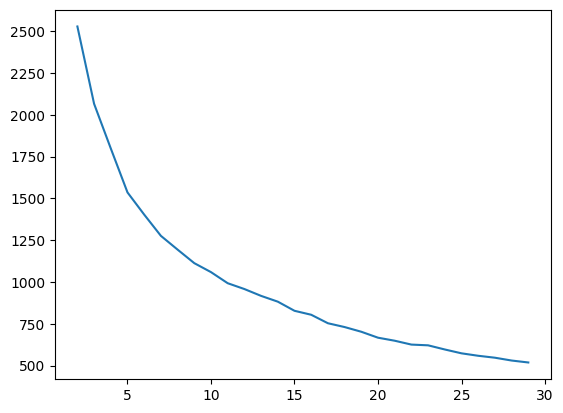

In [34]:
inertias = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_norm)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 30), inertias)

In [35]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
df_clustered = df.loc[df_numeric.index].copy()
df_clustered['cluster'] = kmeans.fit_predict(df_norm)

In [36]:
df_clustered['cluster'].value_counts()

,count
cluster,
1,172
2,118
4,99
0,97
5,9
3,8


In [37]:
# Cluster 5 is made up of the biggest and most powerful companies in the dataset. Their average stock price is extremely high ($834),
# and they earn a lot of money per share (EPS = 28.27), which shows that they’re very profitable. These companies don’t
# really pay dividends (only 0.42%), which means they prefer to put their money back into growing. These are likely huge tech or platform
# companies like Amazon or Google. They’re great for long-term investors who care more about future growth than getting paid right now.

# Cluster 3, on the other hand, has a much lower stock price $109, but it also has small earnings, just 2.02 per share. That’s why its P/E
# ratio is high at 263.42. Investors are paying a lot for stocks that don’t earn much right now, likely hoping those companies will grow later.
# These companies might be trendy or in hot industries, but the actual profits aren’t there yet. That makes them feel overpriced.
# These stocks could explode in value or crash. This is the cluster for people who are okay with taking big risks in return for possible high rewards.

# Cluster 0 is full of reliable, income-producing stocks. They don’t cost much $55, and while they don’t earn a ton EPS = 1.82,
# they do pay out the highest dividends 4.02%. Investors love these kinds of stocks when they want consistent, steady income. The P/E
# ratio is the lowest in the whole group 13.02, meaning these companies are seen as undervalued or fairly priced. These are your “slow
# and steady” companies not exciting, but dependable. They might include utilities, real estate , or other conservative sectors.
# Great for people who want low risk and regular cash flow.

# Cluster 1 includes mid range companies that are pretty balanced. They’re not too expensive $89, not too cheap, and they earn a decent
# amount EPS = 3.79. Their P/E ratio is 21.38, which is right in the middle. They don’t pay a lot of dividends 1.29%, but they’re not trying to.
# These are the kind of companies that fit nicely into a general portfolio they don’t stand out for huge growth or big income, but they’re dependable.

# Cluster 2 is kind of like a stronger version of Cluster 1. These companies earn even more per share (EPS = 5.64), their stock price is a little higher
# $121, and they still don’t cost too much relative to what they earn P/E = 22.30. Their dividend yield is 2.19%, which is respectable.
# These companies are efficient they’re making money and staying consistent without taking on too much risk. This is a great group for investors
# who want a nice balance between growth and income.

# Cluster 4 is the one to be careful with. These companies don’t earn much (EPS = 1.74), and they don’t pay much in dividends 0.77%.
# Their stock price ($89) isn’t low, but for what you get, it’s not a great. They also have the highest volatility, meaning their
# prices jump up and down a lot more than any other group. These could be small companies or ones that are struggling. They might turn
# things around but  they don’t offer much. This is the high-risk, low-reward group
# you’d probably avoid.

df_clustered.groupby('cluster')[numeric_cols].mean().T.round(2)

cluster,0,1,2,3,4,5
Price,55.16,89.34,121.27,109.23,89.83,834.18
Price/Earnings,13.02,21.38,20.88,263.42,23.50,71.12
Dividend Yield,4.02,1.29,2.19,0.94,0.77,0.42
Earnings/Share,1.82,3.79,5.64,0.02,1.74,28.27
Volatility,-0.25,-0.28,-0.27,-0.40,-0.44,-0.34
Log_MarketCap,10.18,10.21,10.96,10.62,10.26,11.07


In [38]:
df.loc[df['Market Cap'] < 2e9, 'MarketCapCategory'] = 'Small Cap'
df.loc[(df['Market Cap'] >= 2e9) & (df['Market Cap'] < 1e10), 'MarketCapCategory'] = 'Mid Cap'
df.loc[(df['Market Cap'] >= 1e10) & (df['Market Cap'] < 1e11), 'MarketCapCategory'] = 'Large Cap'
df.loc[df['Market Cap'] >= 1e11, 'MarketCapCategory'] = 'Mega Cap'
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,52 Week Low,52 Week High,Volatility,Log_MarketCap,MarketCapCategory
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,1.387211e+11,259.77,175.490,-0.324441,11.142142,Mega Cap
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,1.078342e+10,68.39,48.925,-0.284618,10.032757,Large Cap
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,1.021210e+11,64.60,42.280,-0.345511,11.009115,Mega Cap
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,1.813863e+11,125.86,60.050,-0.522883,11.258605,Mega Cap
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,9.876586e+10,162.60,114.820,-0.293850,10.994607,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,1.291502e+10,76.81,46.860,-0.389923,10.111095,Large Cap
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,2.700330e+10,86.93,62.850,-0.277004,10.431417,Large Cap
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,2.445470e+10,133.49,108.170,-0.189677,10.388362,Large Cap
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,1.067068e+10,55.61,38.430,-0.308937,10.028192,Large Cap


#Analysis 5: Chi-squared Test for Independence

In [39]:
# Create contingency table between sector and cap category
contingency = pd.crosstab(df['Sector'], df['MarketCapCategory'])

In [40]:
# From the test bellow, we see that sector and market cap category have a relationship,
# and the effect is statistically significant. The Chi-squared statistic = 57.73 with p < 0.01.

# Null hypothesis: Market cap category is independent of sector.
# Alternative hypothesis: Market cap category distribution depends on sector.

# Significance: Since p < 0.01, we reject the null hypothesis.

# From the chart below, we can make the following observations:

# If there were no relationship between sector and market cap category:
#   - Consumer Discretionary has 11 more Mid Cap companies than expected and 8 fewer Large Caps
#   - Information Technology has 6.8 more Mega Cap firms than expected, but 3.3 fewer Mid Caps
#   - Health Care has 3.8 more Mega Caps and 5.8 fewer Mid Caps than expected
#   - Financials have 5 more Large Cap companies than expected
#   - Real Estate has 5.1 more Mid Caps than expected and 3.4 fewer Large Caps
#   - Consumer Staples has 2.5 more Mega Caps than expected and 4 fewer Mid Caps
results = stats.chi2_contingency(contingency)
results

Chi2ContingencyResult(statistic=np.float64(57.72736288692567), pvalue=np.float64(1.5911207058690957e-05), dof=20, expected_freq=array([[62.20874751,  8.5805169 , 12.21073559],
       [25.48310139,  3.51491054,  5.00198807],
       [23.98409543,  3.30815109,  4.70775348],
       [50.96620278,  7.02982107, 10.00397614],
       [44.97017893,  6.2027833 ,  8.82703777],
       [50.2166998 ,  6.92644135,  9.85685885],
       [52.46520875,  7.23658052, 10.29821074],
       [18.73757455,  2.58449304,  3.67793241],
       [24.73359841,  3.41153082,  4.85487078],
       [ 2.24850895,  0.31013917,  0.44135189],
       [20.9860835 ,  2.89463221,  4.11928429]]))

<Axes: xlabel='MarketCapCategory', ylabel='Sector'>

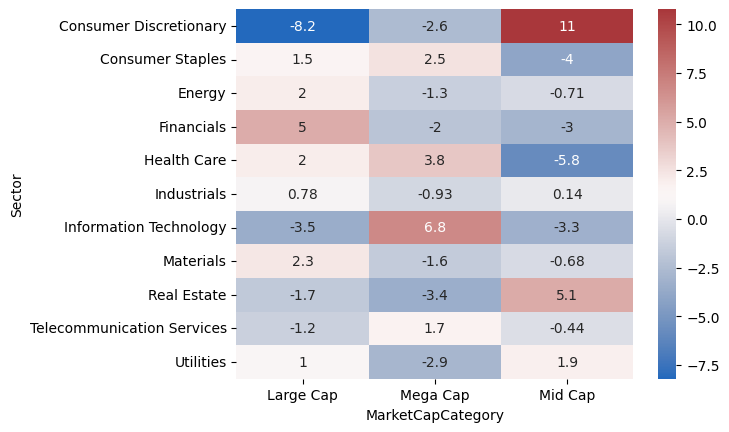

In [41]:
# The Chi-squared test (chi square = 57.73, p < 0.01) shows a significant association between sector and market cap category.
# This indicates that company size is not randomly distributed across sectors. This suggests certain sectors are more likely
# to be dominated by firms of a specific size class, especially mega-cap firms in tech and healthcare.

sns.heatmap(
    contingency - results.expected_freq,
    cmap='vlag',
    annot=True,
)

#Analyis 6: Market Cap Outliers  Dividend Yields

In [42]:
# In this analysis, I set out to determine whether the largest companies in the market—those with the highest
# market capitalizations—exhibit different dividend payout behavior compared to the rest of the market.

# Performing a t-test, we find that there is a statistically significant difference in the mean dividend yield
# between Market Cap outliers top 1% and the rest of the companies, with p = 0.0333.

# Null hypothesis: There is no difference in the mean dividend yield between the top 1% of companies by Market Cap and the rest.
# Alternative hypothesis: There is a difference in the mean dividend yield between these two groups.

# Significance: Since the p-value is less than 0.05, we reject the null hypothesis.
# We conclude that the difference in mean dividend yield between the top 1% of companies by Market Cap and the rest of the dataset is statistically significant.

# The top 1% (outliers) had a mean dividend yield of 0.5757,
# while the rest of the companies had a mean yield of 1.9181.
# This suggests that the largest firms by market cap tend to pay significantly lower dividend yields on average.
cap_threshold = df['Market Cap'].quantile(0.99)

outliers = df[df['Market Cap'] >= cap_threshold]
non_outliers = df[df['Market Cap'] < cap_threshold]

outliers = outliers.dropna(subset=['Dividend Yield'])
non_outliers = non_outliers.dropna(subset=['Dividend Yield'])

stats.ttest_ind(outliers['Dividend Yield'], non_outliers['Dividend Yield'])


TtestResult(statistic=np.float64(-2.133882002706607), pvalue=np.float64(0.03333742990940731), df=np.float64(501.0))

In [43]:
# The results revealed that market cap outliers top 1% had a significantly lower average dividend yield 0.5757
# compared to the rest of the companies 1.9181, with a p-value of 0.0333. Since this p-value falls below the standard
# significance threshold of 0.05, I rejected the null hypothesis and concluded that the difference in dividend yield is
# statistically significant. Contrary to conventional expectations that larger firms return more capital to shareholders,
# the findings suggest that the very largest companies in the dataset actually pay lower dividends on average—possibly
# due to reinvestment strategies, growth-oriented policies, or capital structure differences.

In [44]:
print("Outliers (Top 1%) Mean Yield:", outliers['Dividend Yield'].mean())
print("Non-Outliers (Rest) Mean Yield:", non_outliers['Dividend Yield'].mean())

Outliers (Top 1%) Mean Yield: 0.575722
Non-Outliers (Rest) Mean Yield: 1.9180501353400403


#High Analysis 7: Earnings Performance and Stock Price Volatility

In [45]:
#  Is company’s earnings per share associated with differences in stock price volatility?
#  Specifically, I compared the top 10% of companies with the highest EPS to the bottom 10% with the lowest EPS.
#  The measure of volatility used was the percentage difference between a company’s 52-week high and low prices.

# From the test below, we see that earnings performance and stock price volatility do not have a statistically significant relationship.
# The t-test statistic = 1.640 with p = 0.1047.

# Null hypothesis: There is no difference in mean volatility between the top 10% and bottom 10% of companies by EPS.
# Alternative hypothesis: Mean volatility differs between the highest and lowest EPS groups.

# Significance: Since p > 0.05, we fail to reject the null hypothesis.

# From the results, we can make the following observations:

#   - Top 10% EPS firms had an average volatility of −31.21%
#   - Bottom 10% EPS firms had an average volatility of −34.43%
#   - Despite this slight difference, the variation is not large enough to be considered statistically significant.
#   - This suggests that stock price volatility is not strongly driven by EPS alone and may depend on other market factors.
df['Volatility'] = ((df['52 Week High'] - df['52 Week Low']) / df['52 Week Low']) * 100


eps_high = df['Earnings/Share'].quantile(0.90)
eps_low = df['Earnings/Share'].quantile(0.10)


top_eps = df[df['Earnings/Share'] >= eps_high]
bottom_eps = df[df['Earnings/Share'] <= eps_low]


stats.ttest_ind(top_eps['Volatility'], bottom_eps['Volatility'], equal_var=False)

TtestResult(statistic=np.float64(1.639928476506381), pvalue=np.float64(0.1046506765516492), df=np.float64(86.53025715058469))

In [46]:
# Since we fail to reject the null hypothesis. This suggests that among the S&P 500 companies in this dataset,
# firms with high earnings per share do not exhibit significantly different price volatility compared to those with lower earnings.
print(f"Top 10% EPS Mean Volatility: {top_eps['Volatility'].mean()}")
print(f"Bottom 10% EPS Mean Volatility: {bottom_eps['Volatility'].mean()}")

Top 10% EPS Mean Volatility: -31.21283900862332
Bottom 10% EPS Mean Volatility: -34.425781645203685
